# plot minimalizace EMM v ose  $xz$

In [1]:
# Setup some Jupyter env features
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
# plot dat
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import rcParams

rcParams["font.size"] = 16
rcParams["mathtext.fontset"] = "cm"
rcParams["mathtext.rm"] = "serif"
rcParams["text.usetex"] = "true";
rc('text', usetex=True)


my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

In [17]:
# data import
#import pandas as pd
import numpy as np

#data_bezcond = pd.read_csv("axial_EMM_10_03_2020_part1_delim.txt", sep="\t").values
#voltages_bezcond = pd.read_csv("axial_EMM_10_03_2020_part1_voltages.txt", sep="\t").values

data_p1 = np.genfromtxt("03_05_20_EMM_min_xz_step1_delim.txt", delimiter="\t")[:,:-1]
voltages_p1 = np.genfromtxt("03_05_20_EMM_min_xz_step1_voltages.txt", delimiter="\t")
data_p2 = np.genfromtxt("03_05_20_EMM_min_xz_step2_delim.txt", delimiter="\t")[:,:-1]
voltages_p2 = np.genfromtxt("03_05_20_EMM_min_xz_step2_voltages.txt", delimiter="\t")
# data_p4 = np.genfromtxt("03_05_20_EMM_min_xz_step3_delim.txt", delimiter="\t")[:,:-1]
# voltages_p4 = np.genfromtxt("03_05_20_EMM_min_xz_step3_voltages.txt", delimiter="\t")
data_p3 = np.genfromtxt("03_05_20_EMM_min_xz_multiple_delim.txt", delimiter="\t")[:,:-1]
voltages_p3 = np.genfromtxt("03_05_20_EMM_min_xz_multiple_voltages.txt", delimiter="\t")


fotkor=np.concatenate( (data_p1 ,data_p2, data_p3) ,axis=1)
voltages=np.concatenate( (voltages_p1 ,voltages_p2, voltages_p3) ,axis=0)

# pomocne promene
fotkor_shape = np.shape(fotkor)

# parametry odecitani foton-korelacnich dat
t_res = 256e-12  # casove rozliseni histogramu v s
t_measure = [95, 80, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85] # doba nacitani dat v s
background_photocounts = [130, 130, 140, 140, 140, 130, 130, 130, 130, 130, 130, 130] # ph/s  tyto fotony jsou rovnomerne rozdeleny v prubehu RF periody

# celkovy pocet fotonu:
# photon_sum = np.sum(fotkor, axis=0) - t_measure * background_photocounts
photon_sum = np.sum(fotkor, axis=0) - np.array(t_measure) * np.array(background_photocounts)

hist_sigma = 0.09088658 * np.sqrt( photon_sum )

#------fit 
from EMM_min_func import get_hist_fit

DeltaS_S_ratio, Delta_S_S_ratio_sigma, fot_phi, fot_phi_sigma, x, Omega, Omega_sigma, nu, t_scale = get_hist_fit(fotkor, 
                                                                                                    voltages, t_res, t_measure, 
                                                                                                    background_photocounts, hist_sigma, 
                                                                                                       sign_DeltaS=True, phi0=0.9)

# print(Delta_S_S_ratio_sigma)
# print(fot_phi_sigma)

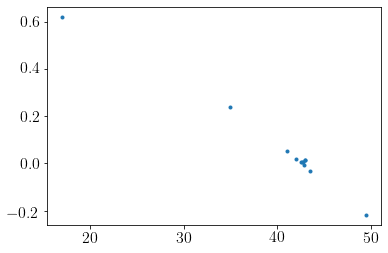

In [18]:
plt.plot(voltages[:,2], DeltaS_S_ratio, '.')

In [19]:
def MM_line(x, z):
    return(x[0] + x[1]*z)

In [20]:
print(DeltaS_S_ratio[10])
print(Delta_S_S_ratio_sigma[10])
print(fot_phi[10])
print(fot_phi_sigma[10])

-0.006819285562456204
0.002697826498490975
-2.2185385368531962
0.3942579101978164


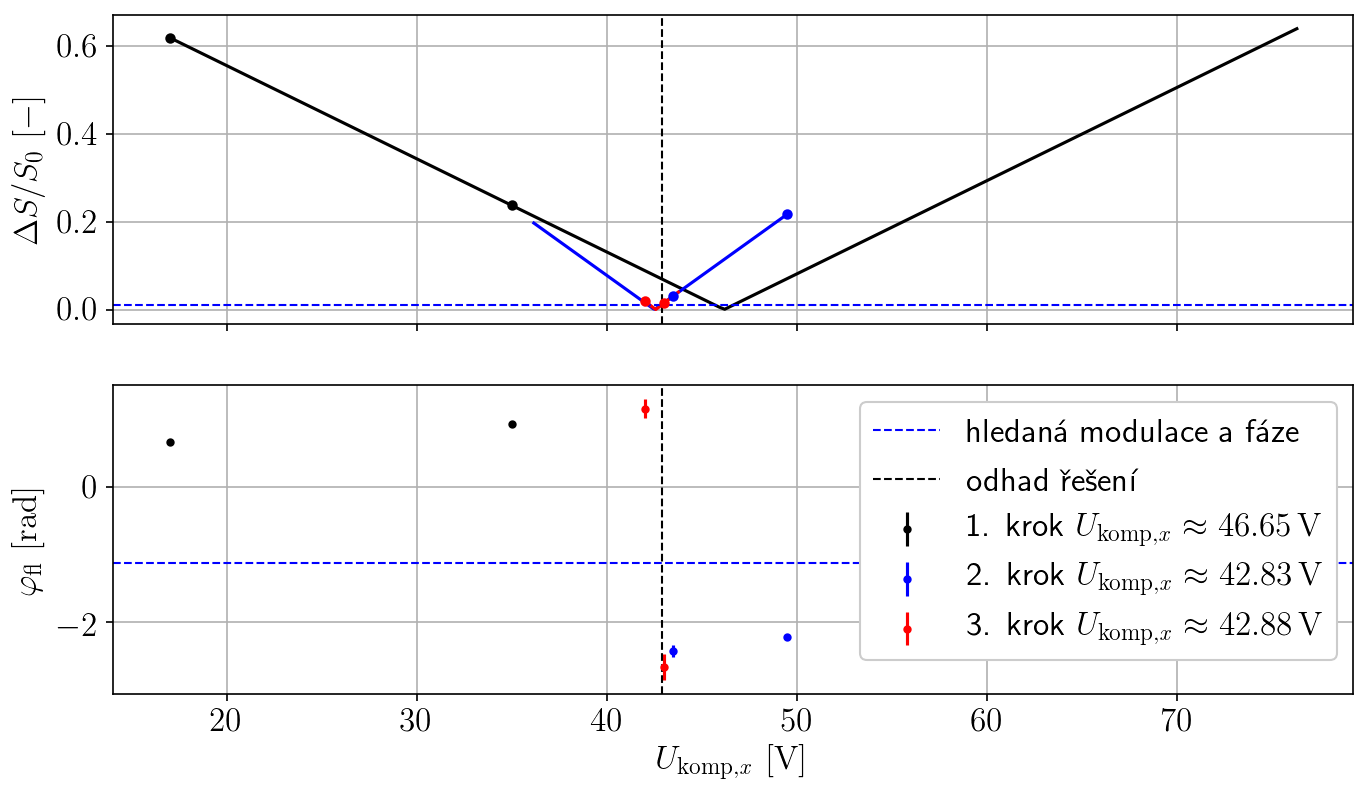

In [22]:
from EMM_min_func import get_DeltaS_S_xz_fit
U_komp_x = voltages[:,2]
gamma = 45/180 * np.pi

DeltaS_S_min_z = 0.01432194339253436
fot_phi_min_z = -1.132696142081028

f, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)


############### prvni krok
#----- vypocet interpolacni primky
U_komp_x_interval, linfit, U_komp_x_fit, DeltaS_S_fit, DeltaS_S_ratio_xz_teor, fot_phi_xz_teor = get_DeltaS_S_xz_fit(DeltaS_S_ratio[:2], 
                                                                                                                     fot_phi[:2], U_komp_x[:2], 
                                                                                                                     DeltaS_S_min_z, 
                                                                                                                     fot_phi_min_z, gamma, iter_coef=0.5)

# primka
U_komp_x_res = np.mean(U_komp_x_interval)
U_komp_x_fit = np.linspace(U_komp_x_res - np.max(np.abs(U_komp_x[:2] - U_komp_x_res)), 
                           U_komp_x_res + np.max(np.abs(U_komp_x[:2] - U_komp_x_res)), 200 )


ax1.errorbar(U_komp_x[:2], np.abs(DeltaS_S_ratio[:2]),
         fmt='.', color='black', markersize=8, yerr=Delta_S_S_ratio_sigma[:2])
ax1.plot(U_komp_x_fit, np.abs(MM_line(linfit, U_komp_x_fit)), color='black')
# ax1.plot(nu_bezcond[9], np.abs(DeltaS_S_ratio[9]),'o' )

ax2.errorbar(U_komp_x[:2], fot_phi[:2], fmt='.', yerr=fot_phi_sigma[:2],
             color='black', label=r'1. krok ' + r'$U_{{\rm komp, \it x}} \approx {:.2f} \, \rm V$'.format(U_komp_x_res))
######################

############### druhy krok
#----- vypocet interpolacni primky
U_komp_x_interval, linfit, U_komp_x_fit, DeltaS_S_fit, DeltaS_S_ratio_xz_teor, fot_phi_xz_teor = get_DeltaS_S_xz_fit(DeltaS_S_ratio[2:4], 
                                                                                                                     fot_phi[2:4], U_komp_x[2:4], 
                                                                                                                     DeltaS_S_min_z, 
                                                                                                                     fot_phi_min_z, gamma, iter_coef=0.5)

# primka
U_komp_x_res = np.mean(U_komp_x_interval)
U_komp_x_fit = np.linspace(U_komp_x_res - np.max(np.abs(U_komp_x[2:4] - U_komp_x_res)), 
                           U_komp_x_res + np.max(np.abs(U_komp_x[2:4] - U_komp_x_res)), 200 )


ax1.errorbar(U_komp_x[2:4], np.abs(DeltaS_S_ratio[2:4]),
         fmt='.', color='blue', markersize=8, yerr=Delta_S_S_ratio_sigma[2:4])
ax1.plot(U_komp_x_fit, np.abs(MM_line(linfit, U_komp_x_fit)), color='blue')
# ax1.plot(nu_bezcond[9], np.abs(DeltaS_S_ratio[9]),'o' )

ax2.errorbar(U_komp_x[2:4], fot_phi[2:4], fmt='.', yerr=fot_phi_sigma[2:4],
             color='blue', label=r'2. krok ' + r'$U_{{\rm komp, \it x}} \approx {:.2f} \, \rm V$'.format(U_komp_x_res))
######################

############### treti krok
#----- vypocet interpolacni primky
U_komp_x_interval, linfit, U_komp_x_fit, DeltaS_S_fit, DeltaS_S_ratio_xz_teor, fot_phi_xz_teor = get_DeltaS_S_xz_fit([-DeltaS_S_ratio[4], DeltaS_S_ratio[5]], 
                                                                                                                     fot_phi[4:6], U_komp_x[4:6], 
                                                                                                                     DeltaS_S_min_z, 
                                                                                                                     fot_phi_min_z, gamma, iter_coef=0.5)

# primka
U_komp_x_res = np.mean(U_komp_x_interval)
U_komp_x_fit = np.linspace(U_komp_x_res - np.max(np.abs(U_komp_x[4:6] - U_komp_x_res)), 
                           U_komp_x_res + np.max(np.abs(U_komp_x[4:6] - U_komp_x_res)), 200 )


ax1.errorbar(U_komp_x[4:6], np.abs(DeltaS_S_ratio[4:6]),
         fmt='.', color='red', markersize=8, yerr=Delta_S_S_ratio_sigma[4:6])
ax1.plot(U_komp_x_fit, np.abs(MM_line(linfit, U_komp_x_fit)), color='red')
# ax1.plot(nu_bezcond[9], np.abs(DeltaS_S_ratio[9]),'o' )

ax2.errorbar(U_komp_x[4:6], fot_phi[4:6], fmt='.', yerr=fot_phi_sigma[4:6],
             color='red', label=r'3. krok ' + r'$U_{{\rm komp, \it x}} \approx {:.2f} \, \rm V$'.format(U_komp_x_res))
######################

# kde bychom meli hledat:
ax1.axhline(DeltaS_S_ratio_xz_teor, linewidth=1, linestyle='--', color='blue')
ax2.axhline(fot_phi_xz_teor, label=r'hledaná modulace a fáze',linewidth=1, linestyle='--',color='blue')

# nalezene reseni + interval pro pristi iteraci
# ax1.plot(U_komp_x_res, np.abs(MM_line(linfit, U_komp_x_res)), 'x', 
#          markersize=10, label=r'$U_{{\rm komp, \it x}} \approx {:.1f} \, \rm V$'.format(U_komp_x_res), color='red')
# ax1.axvline(U_komp_x_interval[0])
# ax1.axvline(U_komp_x_interval[1])

# vertikalni line u fazi
# ax2.axvline(-linfit[0]/linfit[1], linestyle='dotted', color='black')
# ax1.axvline(-linfit[0]/linfit[1], linestyle='dotted', color='black')

# nalezene minimum
ax1.axvline(U_komp_x[10], linestyle='--', linewidth=1, color='black')
ax2.axvline(U_komp_x[10], linestyle='--', linewidth=1, color='black', label=r"odhad řešení")

# popisky

ax2.set_xlabel(r"$ U_{\rm komp, \it x} \, \, \rm [V]$")
ax1.set_ylabel(r"$ \Delta S / S_0 \, \, \rm [-]$")
ax2.set_ylabel(r"$ \varphi_{\rm fl} \, \, \rm [rad]$")

# ax1.legend(framealpha=1)
ax2.legend(framealpha=1)
ax1.grid()
ax2.grid()

# plt.savefig("/home/dan/diplomka_winfiles/Julia_vypocty_diplomka/julia_plots/xz_EMM_minim_proces_03_05_2020.svg", bbox_inches="tight")

In [34]:
## chci spocitat bety
from scipy.optimize import approx_fprime, check_grad

def root_func(x):
    [beta, norm_mod_amp, Omega, laser_detun, decay_rate] = x
    return fl_signal(beta, laser_detun, Omega, decay_rate) - norm_mod_amp

def root_func_grad(x):
#     [beta, norm_mod_amp, Omega, laser_detun, decay_rate] = x
    epsilon = 5e-6
    return( approx_fprime(x, root_func, x*epsilon ) )

In [35]:
# ---- napocitam si i bety
from EMM_min_func import get_beta, fl_signal

# parametry vypoctu beta

decay_rate = 2*np.pi * 21.008e6  # decay rate dle tabulek NISTu
laser_detun = -32e6 * 2*np.pi  # detuning 
laser_detun_sigma = 4e6 * 2*np.pi # sigma detun

# get beta
beta = np.zeros(fotkor_shape[1])
beta_sigma = np.zeros(fotkor_shape[1])
for k in range(fotkor_shape[1]):
    beta[k] = get_beta(Omega, decay_rate, laser_detun, np.abs(DeltaS_S_ratio[k]) )
    
    # get sigma beta
    jacob_F = root_func_grad( np.array([beta[k], np.abs(DeltaS_S_ratio[k]), Omega, laser_detun, decay_rate]) ) 
    # [dF/dbeta, dF/ddeltaS/S, dF/dOmega, dF/dDelta, dF/dGamma]
    
    # variance-cov parametru
    Sigma_param = np.diag([Delta_S_S_ratio_sigma[k]**2, Omega_sigma**2, laser_detun_sigma**2])
    
    beta_sigma[k] = np.sqrt( jacob_F[0]**-2 * jacob_F[1:-1] @ Sigma_param @ np.transpose( jacob_F[1:-1] ) )

In [36]:
beta

array([0.24957923, 0.08438059, 0.01080477, 0.07705405, 0.00491957,
       0.0067973 , 0.0018191 , 0.00200124, 0.01807028, 0.00176379,
       0.00238516, 0.00482563])

In [37]:
beta_sigma

array([0.00700433, 0.00141707, 0.00094609, 0.00133529, 0.00095289,
       0.00096068, 0.00094886, 0.00094495, 0.00097193, 0.00094022,
       0.00094396, 0.00095655])

In [38]:
# beta_sigma = 4* beta_sigma
# Delta_S_S_ratio_sigma = 4* Delta_S_S_ratio_sigma

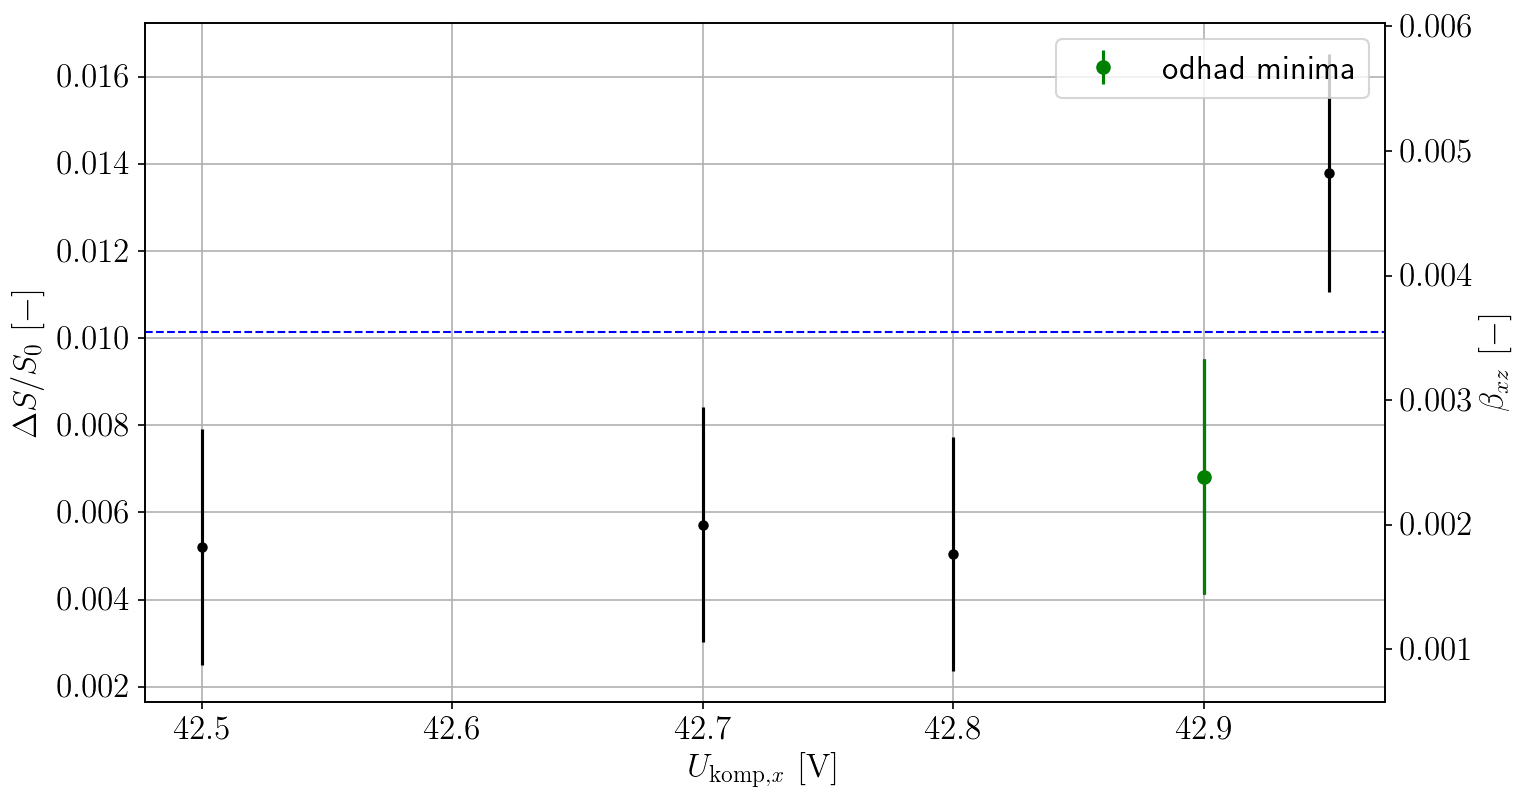

In [39]:
Delta_S_S_ratio_sigma = np.array(Delta_S_S_ratio_sigma)

plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
x = plt.gca()

x.errorbar(U_komp_x[np.array([6,7,9,10,11])], np.abs(DeltaS_S_ratio[np.array([6,7,9,10,11])]), fmt='.', color='black', yerr=Delta_S_S_ratio_sigma[np.array([6,7,9,10,11])], markersize=8)

#--- mereni v minimu
# x.errorbar(nu[np.argmin(beta)], np.abs(DeltaS_S_ratio[np.argmin(beta)]), fmt='.', color='green',
#           yerr = Delta_S_S_ratio_sigma[np.argmin(beta)], markersize=10)
x.errorbar(U_komp_x[10], np.abs(DeltaS_S_ratio[10]), fmt='.', color='green',
          yerr = Delta_S_S_ratio_sigma[10], markersize=12, label=r"odhad minima")

# plot hledane modulace
x.axhline(DeltaS_S_ratio_xz_teor, linewidth=1, linestyle='--', color='blue')

x2 = plt.twinx()
# x2.errorbar(nu[4:], beta[4:], fmt='.', yerr=beta_sigma[4:], color='blue')
x2.errorbar(U_komp_x[np.array([6,7,9,10,11])], beta[np.array([6,7,9,10,11])],fmt='.',
            yerr=beta_sigma[[6,7,9,10,11]], alpha=0)

# --- popisky
x.set_xlabel(r"$ U_{\rm komp, \it x} \, \, \rm [V]$")
x.set_ylabel(r"$ \Delta S / S_0 \, \, \rm [-]$")
x2.set_ylabel(r"$ \beta_{xz} \, \, \rm [-] $")

x.legend()
x.grid()

#plt.savefig("/home/dan/diplomka_winfiles/Julia_vypocty_diplomka/julia_plots/ax_EMM_minim_proces_detail_03_05_2020.svg", bbox_inches="tight")

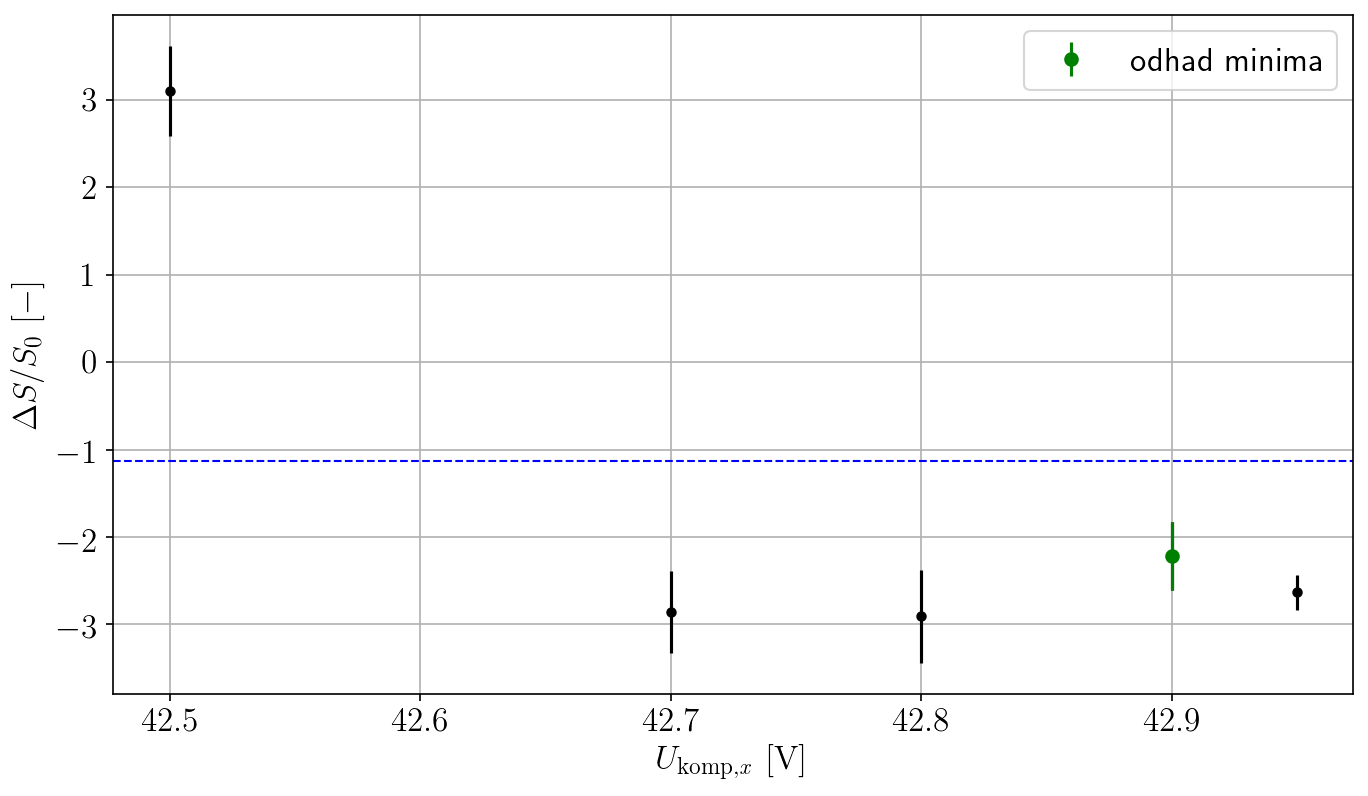

In [40]:
fot_phi_sigma = np.array(fot_phi_sigma)
fot_phi = np.array(fot_phi)

plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
x = plt.gca()

x.errorbar(U_komp_x[np.array([6,7,9,10,11])], fot_phi[np.array([6,7,9,10,11])], fmt='.', color='black', yerr=fot_phi_sigma[np.array([6,7,9,10,11])], markersize=8)

#--- mereni v minimu
# x.errorbar(nu[np.argmin(beta)], np.abs(DeltaS_S_ratio[np.argmin(beta)]), fmt='.', color='green',
#           yerr = Delta_S_S_ratio_sigma[np.argmin(beta)], markersize=10)
x.errorbar(U_komp_x[10], fot_phi[10], fmt='.', color='green',
          yerr = fot_phi_sigma[10], markersize=12, label=r"odhad minima")

# plot hledane modulace
x.axhline(fot_phi_xz_teor, linewidth=1, linestyle='--', color='blue')


# --- popisky
x.set_xlabel(r"$ U_{\rm komp, \it x} \, \, \rm [V]$")
x.set_ylabel(r"$ \Delta S / S_0 \, \, \rm [-]$")
x.legend()
x.grid()

#plt.savefig("/home/dan/diplomka_winfiles/Julia_vypocty_diplomka/julia_plots/ax_EMM_minim_proces_detail_03_05_2020.svg", bbox_inches="tight")

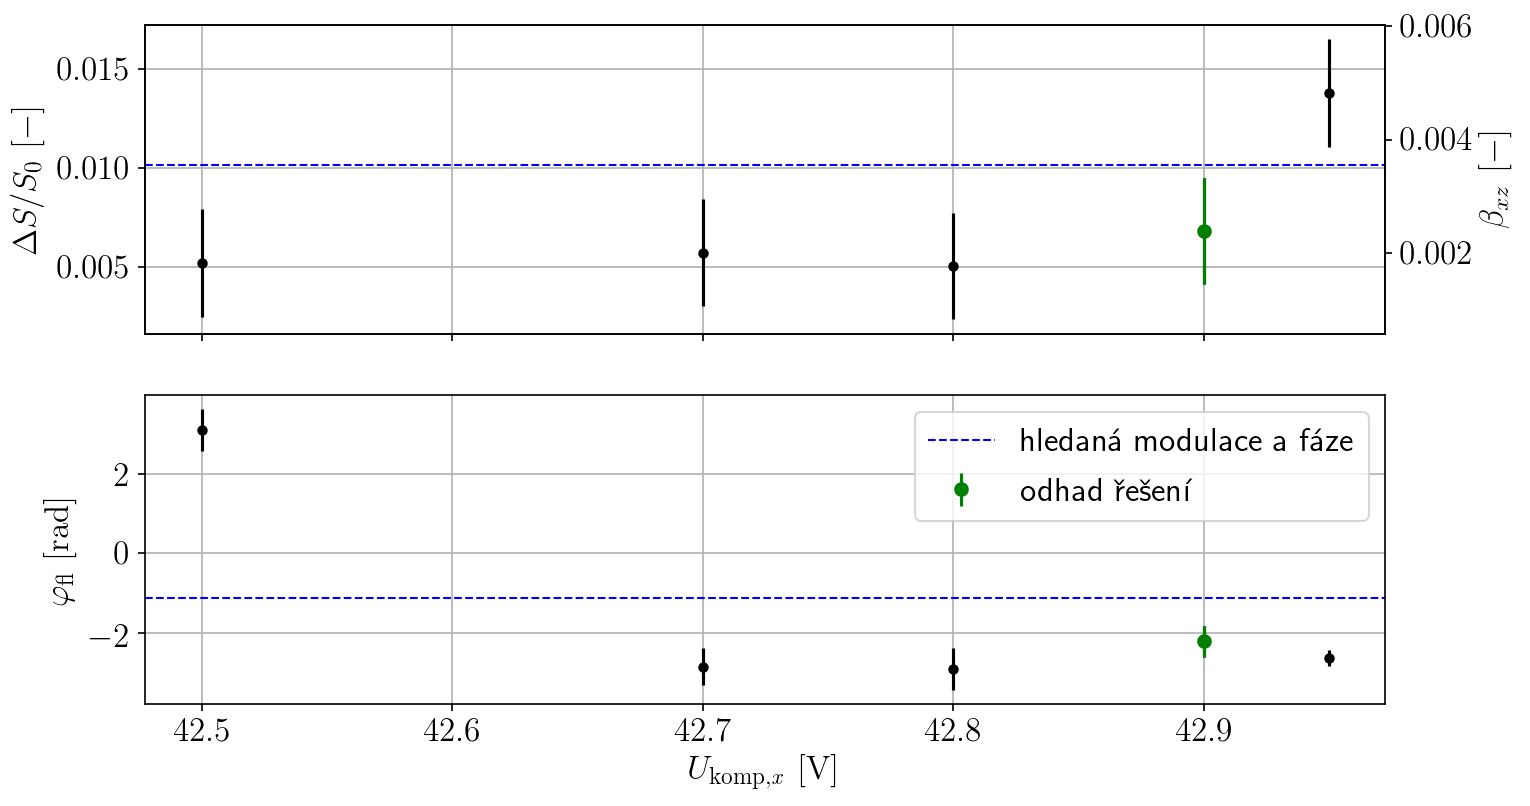

In [41]:
f, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

ax1.errorbar(U_komp_x[[6,7,9,10,11]], np.abs(DeltaS_S_ratio[[6,7,9,10,11]]), fmt='.', color='black', yerr=Delta_S_S_ratio_sigma[[6,7,9,10,11]], markersize=8)

#--- mereni v minimu
# x.errorbar(nu[np.argmin(beta)], np.abs(DeltaS_S_ratio[np.argmin(beta)]), fmt='.', color='green',
#           yerr = Delta_S_S_ratio_sigma[np.argmin(beta)], markersize=10)
ax1.errorbar(U_komp_x[10], np.abs(DeltaS_S_ratio[10]), fmt='.', color='green',
          yerr = Delta_S_S_ratio_sigma[10], markersize=12, label=r"odhad řešení")

# plot hledane modulace
ax1.axhline(DeltaS_S_ratio_xz_teor, linewidth=1, linestyle='--', color='blue')

ax12 = ax1.twinx()
# x2.errorbar(nu[4:], beta[4:], fmt='.', yerr=beta_sigma[4:], color='blue')
ax12.errorbar(U_komp_x[np.array([6,7,9,10,11])], beta[np.array([6,7,9,10,11])],fmt='.',
            yerr=beta_sigma[[6,7,9,10,11]], alpha=0)

ax2.errorbar(U_komp_x[np.array([6,7,9,10,11])], fot_phi[np.array([6,7,9,10,11])], fmt='.', color='black', yerr=fot_phi_sigma[np.array([6,7,9,10,11])], markersize=8)

#--- mereni v minimu
# x.errorbar(nu[np.argmin(beta)], np.abs(DeltaS_S_ratio[np.argmin(beta)]), fmt='.', color='green',
#           yerr = Delta_S_S_ratio_sigma[np.argmin(beta)], markersize=10)
ax2.errorbar(U_komp_x[10], fot_phi[10], fmt='.', color='green',
          yerr = fot_phi_sigma[10], markersize=12, label=r"odhad řešení")

# plot hledane modulace
ax2.axhline(fot_phi_xz_teor, linewidth=1, linestyle='--', color='blue', label=r"hledaná modulace a fáze")


# --- popisky
ax2.set_xlabel(r"$ U_{\rm komp, \it x} \, \, \rm [V]$")
ax1.set_ylabel(r"$ \Delta S / S_0 \, \, \rm [-]$")
ax12.set_ylabel(r"$ \beta_{xz} \, \, \rm [-] $")
ax2.set_ylabel(r"$\varphi_{\rm fl} \, \, \rm [rad] $")

# ax1.legend()
ax1.grid()
ax2.legend()
ax2.grid()

# plt.savefig("/home/dan/diplomka_winfiles/Julia_vypocty_diplomka/julia_plots/xz_EMM_minim_proces_detail_03_05_2020.svg", bbox_inches="tight")

In [42]:
f, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

ax1.errorbar(U_komp_x[6:], np.abs(DeltaS_S_ratio[6:]), fmt='.', color='black', yerr=Delta_S_S_ratio_sigma[6:], markersize=8)

#--- mereni v minimu
# x.errorbar(nu[np.argmin(beta)], np.abs(DeltaS_S_ratio[np.argmin(beta)]), fmt='.', color='green',
#           yerr = Delta_S_S_ratio_sigma[np.argmin(beta)], markersize=10)
ax1.errorbar(U_komp_x[10], np.abs(DeltaS_S_ratio[10]), fmt='.', color='green',
          yerr = Delta_S_S_ratio_sigma[10], markersize=12, label=r"odhad minima")

# plot hledane modulace
ax1.axhline(DeltaS_S_ratio_xz_teor, linewidth=1, linestyle='--', color='blue')

ax12 = ax1.twinx()
# x2.errorbar(nu[4:], beta[4:], fmt='.', yerr=beta_sigma[4:], color='blue')
ax12.errorbar(U_komp_x[6:], beta[6:],fmt='.',
            yerr=beta_sigma[6:], alpha=0)

ax2.errorbar(U_komp_x[6:], fot_phi[6:], fmt='.', color='black', yerr=fot_phi_sigma[6:], markersize=8)

#--- mereni v minimu
# x.errorbar(nu[np.argmin(beta)], np.abs(DeltaS_S_ratio[np.argmin(beta)]), fmt='.', color='green',
#           yerr = Delta_S_S_ratio_sigma[np.argmin(beta)], markersize=10)
ax2.errorbar(U_komp_x[10], fot_phi[10], fmt='.', color='green',
          yerr = fot_phi_sigma[10], markersize=12, label=r"odhad minima")

# plot hledane modulace
ax2.axhline(fot_phi_xz_teor, linewidth=1, linestyle='--', color='blue', label=r"hledaná modulace a fáze")


# --- popisky
ax2.set_xlabel(r"$ U_{\rm komp, \it x} \, \, \rm [V]$")
ax1.set_ylabel(r"$ \Delta S / S_0 \, \, \rm [-]$")
ax12.set_ylabel(r"$ \beta_{xz} \, \, \rm [-] $")

# ax1.legend()
ax1.grid()
ax2.legend()
ax2.grid()

# plot pro data z 24.5.

In [62]:
# data import
#import pandas as pd
import numpy as np

#data_bezcond = pd.read_csv("axial_EMM_10_03_2020_part1_delim.txt", sep="\t").values
#voltages_bezcond = pd.read_csv("axial_EMM_10_03_2020_part1_voltages.txt", sep="\t").values

data_p1 = np.genfromtxt("24_05_20_EMM_min_xz_step1_delim.txt", delimiter="\t")[:,:-1]
voltages_p1 = np.genfromtxt("24_05_20_EMM_min_xz_step1_voltages.txt", delimiter="\t")
data_p2 = np.genfromtxt("24_05_20_EMM_min_xz_step2_delim.txt", delimiter="\t")[:,:-1]
voltages_p2 = np.genfromtxt("24_05_20_EMM_min_xz_step2_voltages.txt", delimiter="\t")
data_p3 = np.genfromtxt("24_05_20_EMM_min_xz_step3_delim.txt", delimiter="\t")[:,:-1]
voltages_p3 = np.genfromtxt("24_05_20_EMM_min_xz_step3_voltages.txt", delimiter="\t")
data_p4 = np.genfromtxt("24_05_20_EMM_min_xz_multiple_delim.txt", delimiter="\t")[:,2:-1]
voltages_p4 = np.genfromtxt("24_05_20_EMM_min_xz_multiple_voltages.txt", delimiter="\t")[2:,:]


fotkor=np.concatenate( (data_p1 ,data_p2, data_p3, data_p4) ,axis=1)
voltages=np.concatenate( (voltages_p1 ,voltages_p2, voltages_p3, voltages_p4) ,axis=0)
print(voltages)

# pomocne promene
fotkor_shape = np.shape(fotkor)

# parametry odecitani foton-korelacnich dat
t_res = 256e-12  # casove rozliseni histogramu v s
t_measure = [80,80,80,80,80,80, 80, 80,80, 80, 400, 400] # doba nacitani dat v s
background_photocounts = [170,170,170,170,170,170, 170, 170, 170, 170, 170, 170] # ph/s  tyto fotony jsou rovnomerne rozdeleny v prubehu RF perio

# celkovy pocet fotonu:
# photon_sum = np.sum(fotkor, axis=0) - t_measure * background_photocounts
photon_sum = np.sum(fotkor, axis=0) - np.array(t_measure) * np.array(background_photocounts)

hist_sigma = 0.09088658 * np.sqrt( photon_sum )

#------fit 
from EMM_min_func import get_hist_fit

DeltaS_S_ratio, Delta_S_S_ratio_sigma, fot_phi, fot_phi_sigma, x, Omega, Omega_sigma, nu, t_scale = get_hist_fit(fotkor, 
                                                                                                    voltages, t_res, t_measure, 
                                                                                                    background_photocounts, hist_sigma, 
                                                                                                       sign_DeltaS=True, phi0=0.9)

[[581.8 418.2  50.   50. ]
 [581.8 418.2  30.   50. ]
 [581.8 418.2  41.   50. ]
 [581.8 418.2  44.5  50. ]
 [581.8 418.2  43.3  50. ]
 [581.8 418.2  42.7  50. ]
 [581.8 418.2  42.8  50. ]
 [581.8 418.2  42.9  50. ]
 [581.8 418.2  43.   50. ]
 [581.8 418.2  43.1  50. ]
 [581.8 418.2  43.1  50. ]
 [581.8 418.2  43.3  50. ]]


In [63]:
print(DeltaS_S_ratio)
print(fot_phi)

[ 0.21359453 -0.38543828 -0.06749215  0.0444199  -0.00383861 -0.01914709
 -0.01309234 -0.0119067  -0.01128006  0.0032169   0.002778   -0.00579879]
[-2.338892070243251, 0.8227525256564819, 0.8887961605216349, -2.353176483321349, 2.7732513977800872, 1.173130845794106, 1.1523541211610544, 1.3607549583860332, 1.6706943998932793, -1.8464099028465233, 1.4122145404083142, -2.7261963429548963]


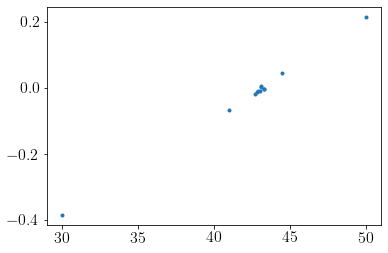

In [64]:
plt.plot(voltages[:,2], DeltaS_S_ratio, '.')

In [65]:
print(DeltaS_S_ratio[10])
print(Delta_S_S_ratio_sigma[10])
print(fot_phi[10])
print(fot_phi_sigma[10])

0.0027779983695336136
0.0013123855971173323
1.4122145404083142
0.4661516001916976


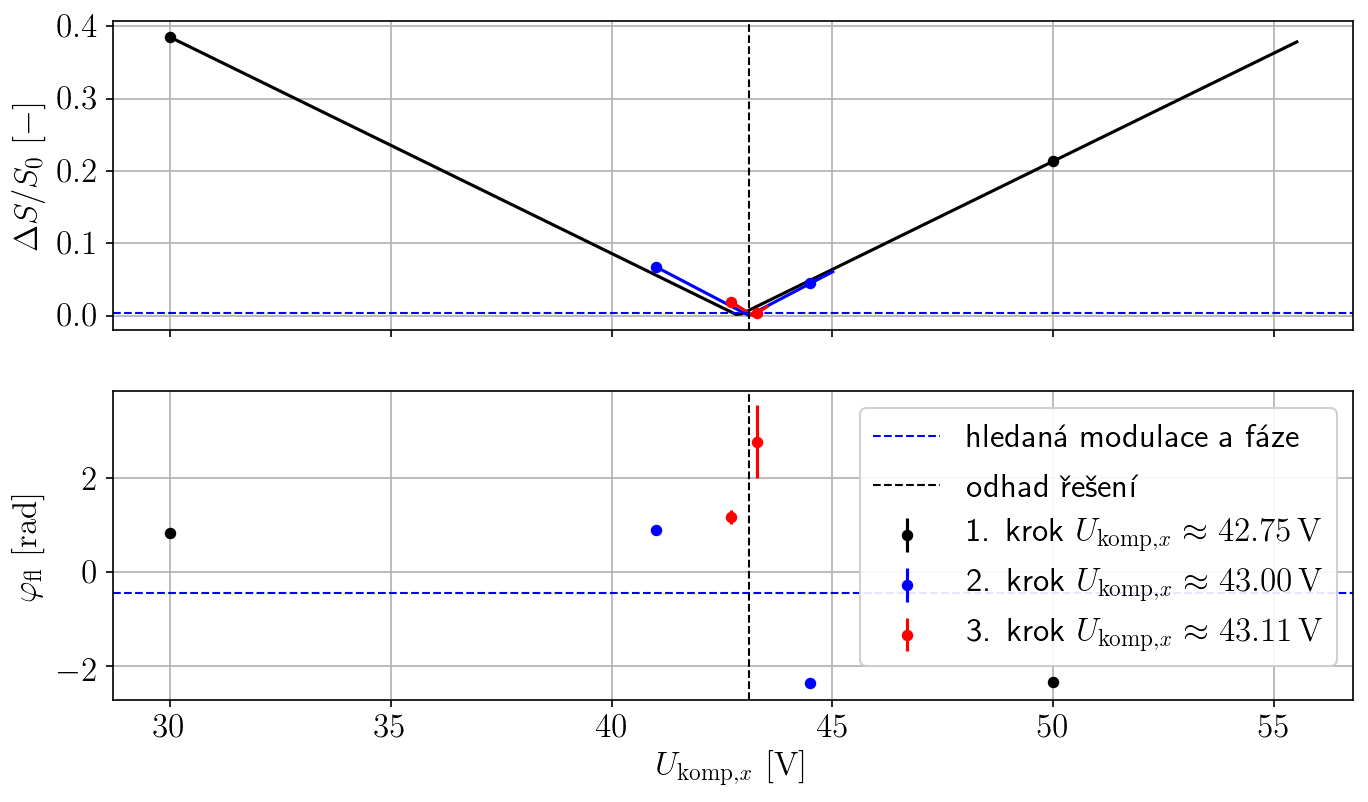

In [66]:
from EMM_min_func import get_DeltaS_S_xz_fit, MM_line
U_komp_x = voltages[:,2]
gamma = 45/180 * np.pi

DeltaS_S_min_z = 0.004858465230171026
fot_phi_min_z = -0.43432661441748804

f, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)


############### prvni krok
#----- vypocet interpolacni primky
U_komp_x_interval, linfit, U_komp_x_fit, DeltaS_S_fit, DeltaS_S_ratio_xz_teor, fot_phi_xz_teor = get_DeltaS_S_xz_fit(DeltaS_S_ratio[:2], 
                                                                                                                     fot_phi[:2], U_komp_x[:2], 
                                                                                                                     DeltaS_S_min_z, 
                                                                                                                     fot_phi_min_z, gamma, iter_coef=0.5)

# primka
U_komp_x_res = np.mean(U_komp_x_interval)
U_komp_x_fit = np.linspace(U_komp_x_res - np.max(np.abs(U_komp_x[:2] - U_komp_x_res)), 
                           U_komp_x_res + np.max(np.abs(U_komp_x[:2] - U_komp_x_res)), 200 )


ax1.errorbar(U_komp_x[:2], np.abs(DeltaS_S_ratio[:2]),
         fmt='.', color='black', markersize=9, yerr=Delta_S_S_ratio_sigma[:2])
ax1.plot(U_komp_x_fit, np.abs(MM_line(linfit, U_komp_x_fit)), color='black')
# ax1.plot(nu_bezcond[9], np.abs(DeltaS_S_ratio[9]),'o' )

ax2.errorbar(U_komp_x[:2], fot_phi[:2], fmt='.', yerr=fot_phi_sigma[:2],
             color='black', label=r'1. krok ' + r'$U_{{\rm komp, \it x}} \approx {:.2f} \, \rm V$'.format(U_komp_x_res), markersize=9)
######################

############### druhy krok
#----- vypocet interpolacni primky
U_komp_x_interval, linfit, U_komp_x_fit, DeltaS_S_fit, DeltaS_S_ratio_xz_teor, fot_phi_xz_teor = get_DeltaS_S_xz_fit(DeltaS_S_ratio[2:4], 
                                                                                                                     fot_phi[2:4], U_komp_x[2:4], 
                                                                                                                     DeltaS_S_min_z, 
                                                                                                                     fot_phi_min_z, gamma, iter_coef=0.5)

# primka
U_komp_x_res = np.mean(U_komp_x_interval)
U_komp_x_fit = np.linspace(U_komp_x_res - np.max(np.abs(U_komp_x[2:4] - U_komp_x_res)), 
                           U_komp_x_res + np.max(np.abs(U_komp_x[2:4] - U_komp_x_res)), 200 )


ax1.errorbar(U_komp_x[2:4], np.abs(DeltaS_S_ratio[2:4]),
         fmt='.', color='blue', markersize=9, yerr=Delta_S_S_ratio_sigma[2:4])
ax1.plot(U_komp_x_fit, np.abs(MM_line(linfit, U_komp_x_fit)), color='blue')
# ax1.plot(nu_bezcond[9], np.abs(DeltaS_S_ratio[9]),'o' )

ax2.errorbar(U_komp_x[2:4], fot_phi[2:4], fmt='.', yerr=fot_phi_sigma[2:4],
             color='blue', label=r'2. krok ' + r'$U_{{\rm komp, \it x}} \approx {:.2f} \, \rm V$'.format(U_komp_x_res), markersize=9)
######################

############### treti krok
#----- vypocet interpolacni primky
U_komp_x_interval, linfit, U_komp_x_fit, DeltaS_S_fit, DeltaS_S_ratio_xz_teor, fot_phi_xz_teor = get_DeltaS_S_xz_fit([-DeltaS_S_ratio[4], DeltaS_S_ratio[5]], 
                                                                                                                     fot_phi[4:6], U_komp_x[4:6], 
                                                                                                                     DeltaS_S_min_z, 
                                                                                                                     fot_phi_min_z, gamma, iter_coef=0.5)

# primka
U_komp_x_res = np.mean(U_komp_x_interval)
U_komp_x_fit = np.linspace(U_komp_x_res - np.max(np.abs(U_komp_x[4:6] - U_komp_x_res)), 
                           U_komp_x_res + np.max(np.abs(U_komp_x[4:6] - U_komp_x_res)), 200 )


ax1.errorbar(U_komp_x[4:6], np.abs(DeltaS_S_ratio[4:6]),
         fmt='.', color='red', markersize=9, yerr=Delta_S_S_ratio_sigma[4:6])
ax1.plot(U_komp_x_fit, np.abs(MM_line(linfit, U_komp_x_fit)), color='red')
# ax1.plot(nu_bezcond[9], np.abs(DeltaS_S_ratio[9]),'o' )

ax2.errorbar(U_komp_x[4:6], fot_phi[4:6], fmt='.', yerr=fot_phi_sigma[4:6],
             color='red', label=r'3. krok ' + r'$U_{{\rm komp, \it x}} \approx {:.2f} \, \rm V$'.format(U_komp_x_res), markersize=9)
######################

# kde bychom meli hledat:
ax1.axhline(DeltaS_S_ratio_xz_teor, linewidth=1, linestyle='--', color='blue')
ax2.axhline(fot_phi_xz_teor, label=r'hledaná modulace a fáze',linewidth=1, linestyle='--',color='blue')

# nalezene reseni + interval pro pristi iteraci
# ax1.plot(U_komp_x_res, np.abs(MM_line(linfit, U_komp_x_res)), 'x', 
#          markersize=10, label=r'$U_{{\rm komp, \it x}} \approx {:.1f} \, \rm V$'.format(U_komp_x_res), color='red')
# ax1.axvline(U_komp_x_interval[0])
# ax1.axvline(U_komp_x_interval[1])

# vertikalni line u fazi
# ax2.axvline(-linfit[0]/linfit[1], linestyle='dotted', color='black')
# ax1.axvline(-linfit[0]/linfit[1], linestyle='dotted', color='black')

# nalezene minimum
ax1.axvline(U_komp_x[10], linestyle='--', linewidth=1, color='black')
ax2.axvline(U_komp_x[10], linestyle='--', linewidth=1, color='black', label=r"odhad řešení")



# popisky
ax1.set_yticks([0, 0.1, 0.2, 0.3, 0.4])

ax2.set_xlabel(r"$ U_{\rm komp, \it x} \, \, \rm [V]$")
ax1.set_ylabel(r"$ \Delta S / S_0 \, \, \rm [-]$")
ax2.set_ylabel(r"$ \varphi_{\rm fl} \, \, \rm [rad]$")

# ax1.legend(framealpha=1)
ax2.legend(framealpha=.9)
ax1.grid()
ax2.grid()

# plt.savefig("/home/dan/diplomka_winfiles/Julia_vypocty_diplomka/julia_plots/xz_EMM_minim_proces_24_05_2020.svg", bbox_inches="tight")

In [67]:
## chci spocitat bety
from scipy.optimize import approx_fprime, check_grad

def root_func(x):
    [beta, norm_mod_amp, Omega, laser_detun, decay_rate] = x
    return fl_signal(beta, laser_detun, Omega, decay_rate) - norm_mod_amp

def root_func_grad(x):
#     [beta, norm_mod_amp, Omega, laser_detun, decay_rate] = x
    epsilon = 5e-6
    return( approx_fprime(x, root_func, x*epsilon ) )

In [68]:
# ---- napocitam si i bety
from EMM_min_func import get_beta, fl_signal

# parametry vypoctu beta

decay_rate = 2*np.pi * 21.008e6  # decay rate dle tabulek NISTu
laser_detun = -32e6 * 2*np.pi  # detuning 
laser_detun_sigma = 4e6 * 2*np.pi # sigma detun

# get beta
beta = np.zeros(fotkor_shape[1])
beta_sigma = np.zeros(fotkor_shape[1])
for k in range(fotkor_shape[1]):
    beta[k] = get_beta(Omega, decay_rate, laser_detun, np.abs(DeltaS_S_ratio[k]) )
    
    # get sigma beta
    jacob_F = root_func_grad( np.array([beta[k], np.abs(DeltaS_S_ratio[k]), Omega, laser_detun, decay_rate]) ) 
    # [dF/dbeta, dF/ddeltaS/S, dF/dOmega, dF/dDelta, dF/dGamma]
    
    # variance-cov parametru
    Sigma_param = np.diag([Delta_S_S_ratio_sigma[k]**2, Omega_sigma**2, laser_detun_sigma**2])
    
    beta_sigma[k] = np.sqrt( jacob_F[0]**-2 * jacob_F[1:-1] @ Sigma_param @ np.transpose( jacob_F[1:-1] ) )

In [69]:
beta

array([0.07573579, 0.14134952, 0.02363395, 0.0155427 , 0.00134236,
       0.00669644, 0.00457861, 0.00416393, 0.00394477, 0.00112495,
       0.00097146, 0.00202785])

In [70]:
beta_sigma

array([0.00140706, 0.00239159, 0.00111718, 0.00109854, 0.00103164,
       0.00102427, 0.00102761, 0.00103333, 0.00104005, 0.00103356,
       0.00045905, 0.00046405])

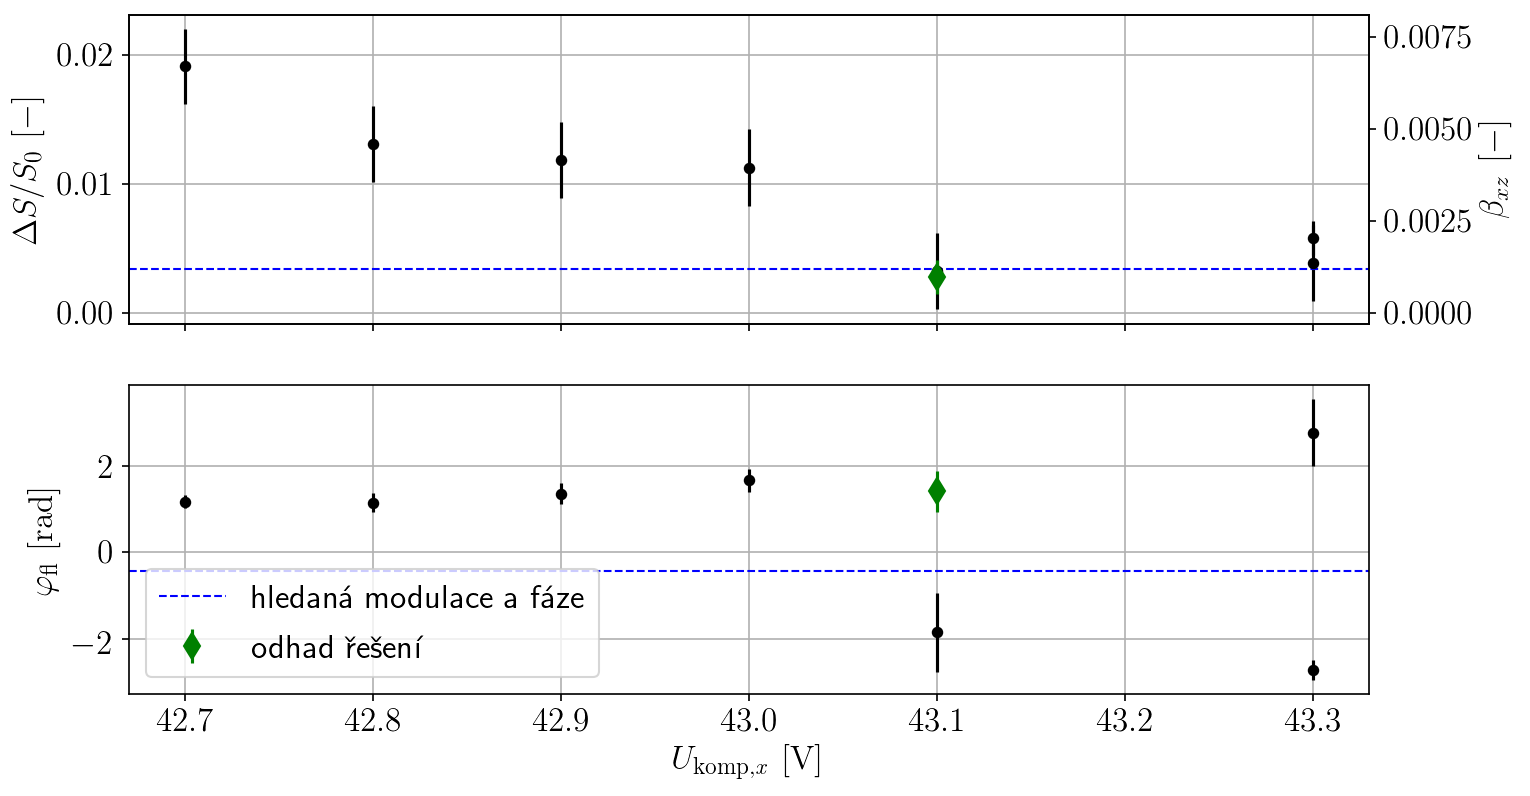

In [71]:
f, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

indexes = np.array([4, 5,6,7,8,9,11])
Delta_S_S_ratio_sigma = np.array(Delta_S_S_ratio_sigma)
fot_phi = np.array(fot_phi)
fot_phi_sigma = np.array(fot_phi_sigma)

ax1.errorbar(U_komp_x[indexes], np.abs(DeltaS_S_ratio[indexes]), fmt='.', color='black', yerr=Delta_S_S_ratio_sigma[indexes], markersize=9)

#--- mereni v minimu
# x.errorbar(nu[np.argmin(beta)], np.abs(DeltaS_S_ratio[np.argmin(beta)]), fmt='.', color='green',
#           yerr = Delta_S_S_ratio_sigma[np.argmin(beta)], markersize=10)
ax1.errorbar(U_komp_x[10], np.abs(DeltaS_S_ratio[10]), fmt='d', color='green',
          yerr = Delta_S_S_ratio_sigma[10], markersize=9, label=r"odhad řešení")

# plot hledane modulace
ax1.axhline(DeltaS_S_ratio_xz_teor, linewidth=1, linestyle='--', color='blue')

ax12 = ax1.twinx()
# x2.errorbar(nu[4:], beta[4:], fmt='.', yerr=beta_sigma[4:], color='blue')
ax12.errorbar(U_komp_x[np.array(indexes)], beta[np.array(indexes)],fmt='.',
            yerr=beta_sigma[indexes], alpha=0)

ax2.errorbar(U_komp_x[np.array(indexes)], fot_phi[np.array(indexes)], fmt='.', color='black', yerr=fot_phi_sigma[np.array(indexes)], markersize=9)
# ax2.errorbar(U_komp_x[np.array(indexes)], fot_phi[np.array(indexes)] - fot_phi[12], fmt='.', color='black', yerr=fot_phi_sigma[np.array(indexes)], markersize=9)

#--- mereni v minimu
# x.errorbar(nu[np.argmin(beta)], np.abs(DeltaS_S_ratio[np.argmin(beta)]), fmt='.', color='green',
#           yerr = Delta_S_S_ratio_sigma[np.argmin(beta)], markersize=10)
ax2.errorbar(U_komp_x[10], fot_phi[10], fmt='d', color='green',
          yerr = fot_phi_sigma[10], markersize=9, label=r"odhad řešení")
# ax1.plot(U_komp_x[11], np.abs( DeltaS_S_ratio[11] ), 'x')

# plot hledane modulace
ax2.axhline(fot_phi_xz_teor, linewidth=1, linestyle='--', color='blue', label=r"hledaná modulace a fáze")
# ax2.axhline(fot_phi_xz_teor -2*np.pi, linewidth=1, linestyle='--', color='blue')
# ax2.axhline(fot_phi_xz_teor +2*np.pi, linewidth=1, linestyle='--', color='blue')

# --- popisky
ax2.set_xlabel(r"$ U_{\rm komp, \it x} \, \, \rm [V]$")
ax1.set_ylabel(r"$ \Delta S / S_0 \, \, \rm [-]$")
ax12.set_ylabel(r"$ \beta_{xz} \, \, \rm [-] $")
ax2.set_ylabel(r"$\varphi_{\rm fl} \, \, \rm [rad] $")

# ax1.legend()
ax1.grid()
ax2.legend()
ax2.grid()

# plt.savefig("/home/dan/diplomka_winfiles/Julia_vypocty_diplomka/julia_plots/xz_EMM_minim_proces_detail_03_05_2020.svg", bbox_inches="tight")

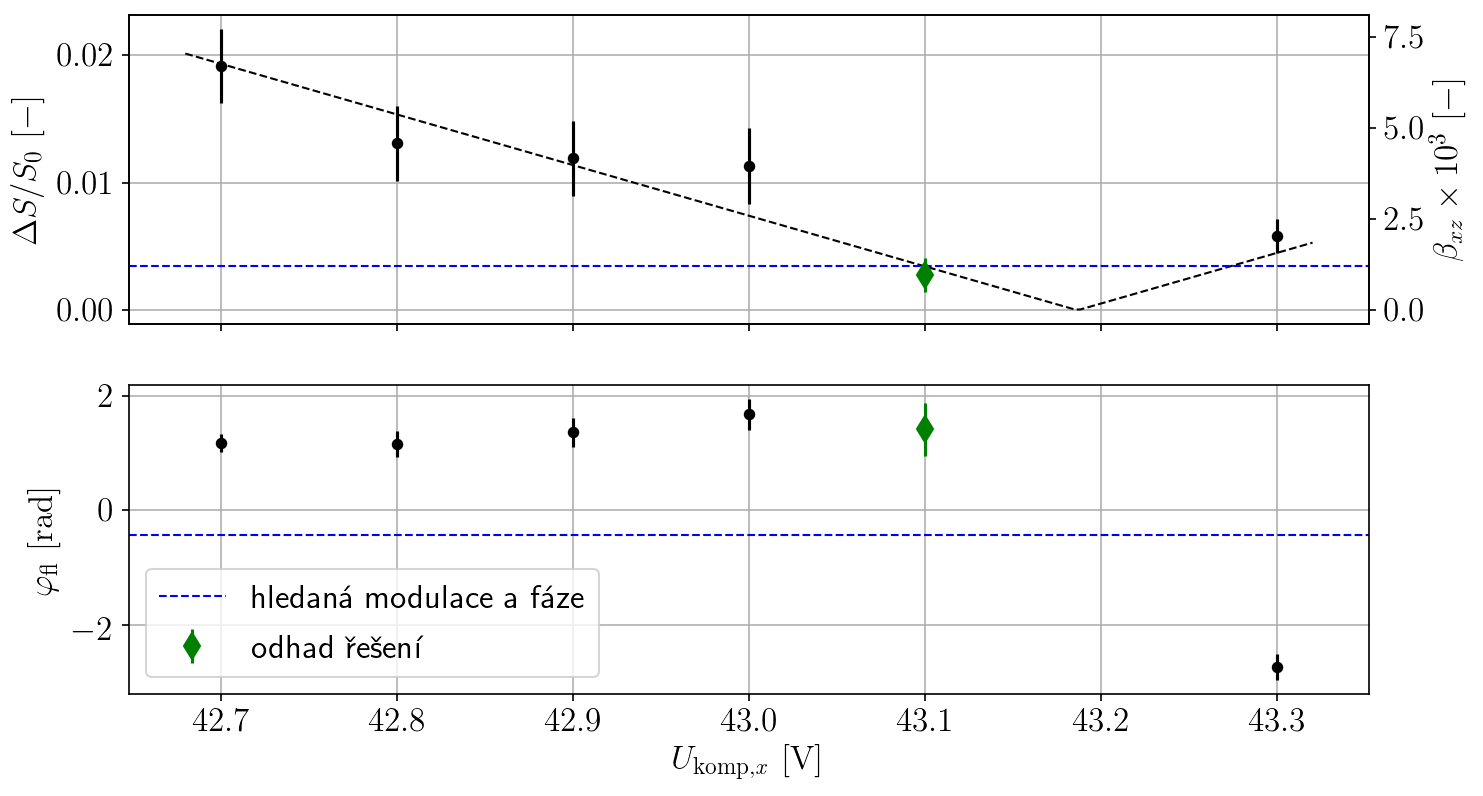

In [98]:
f, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

indexes = np.array([ 5,6,7,8,11])
indexes_line_fit = [5,6,7,8,10,11]
Delta_S_S_ratio_sigma = np.array(Delta_S_S_ratio_sigma)
fot_phi = np.array(fot_phi)
fot_phi_sigma = np.array(fot_phi_sigma)


# zkusim body prolozit primkou
from scipy.optimize import least_squares
from EMM_min_func import MM_resid, MM_line
# kvuli spravnosti fitu potrebuju upravit znamenka
DeltaS_S_ratio[10] = - DeltaS_S_ratio[10]
DeltaS_S_ratio[11] = - DeltaS_S_ratio[11]

fit = least_squares(MM_resid, x0=[1,1], args=(DeltaS_S_ratio[indexes_line_fit], U_komp_x[indexes_line_fit]))

U_komp_delta = 0.02
U_komp_x_fit = np.linspace(min(U_komp_x[indexes_line_fit])-U_komp_delta, max(U_komp_x[indexes_line_fit])+U_komp_delta, 200)
DeltaS_S_fit = MM_line(fit.x, U_komp_x_fit)
#######

ax1.errorbar(U_komp_x[indexes], np.abs(DeltaS_S_ratio[indexes]), fmt='.', color='black', yerr=Delta_S_S_ratio_sigma[indexes], markersize=9)
ax1.plot(U_komp_x_fit, np.abs(DeltaS_S_fit), linestyle='--', linewidth=1, color='black', label=r"proložení přímkou" )

#--- mereni v minimu
# x.errorbar(nu[np.argmin(beta)], np.abs(DeltaS_S_ratio[np.argmin(beta)]), fmt='.', color='green',
#           yerr = Delta_S_S_ratio_sigma[np.argmin(beta)], markersize=10)
ax1.errorbar(U_komp_x[10], np.abs(DeltaS_S_ratio[10]), fmt='d', color='green',
          yerr = Delta_S_S_ratio_sigma[10], markersize=9, label=r"odhad řešení")

# plot hledane modulace
ax1.axhline(DeltaS_S_ratio_xz_teor, linewidth=1, linestyle='--', color='blue')

ax12 = ax1.twinx()
# x2.errorbar(nu[4:], beta[4:], fmt='.', yerr=beta_sigma[4:], color='blue')
ax12.errorbar(U_komp_x[np.array(indexes)], beta[np.array(indexes)]*1e3,fmt='.',
            yerr=beta_sigma[indexes]*1e3, alpha=0)
ax12.set_ylim(  get_beta(Omega, decay_rate, laser_detun, ax1.get_ylim()[0] )*1e3, get_beta(Omega, decay_rate, laser_detun, ax1.get_ylim()[1] )*1e3)

ax2.errorbar(U_komp_x[np.array(indexes)], fot_phi[np.array(indexes)], fmt='.', color='black', yerr=fot_phi_sigma[np.array(indexes)], markersize=9)
# ax2.errorbar(U_komp_x[np.array(indexes)], fot_phi[np.array(indexes)] - fot_phi[12], fmt='.', color='black', yerr=fot_phi_sigma[np.array(indexes)], markersize=9)

#--- mereni v minimu
# x.errorbar(nu[np.argmin(beta)], np.abs(DeltaS_S_ratio[np.argmin(beta)]), fmt='.', color='green',
#           yerr = Delta_S_S_ratio_sigma[np.argmin(beta)], markersize=10)
ax2.errorbar(U_komp_x[10], fot_phi[10], fmt='d', color='green',
          yerr = fot_phi_sigma[10], markersize=9, label=r"odhad řešení")
# ax1.plot(U_komp_x[11], np.abs( DeltaS_S_ratio[11] ), 'x')

# plot hledane modulace
ax2.axhline(fot_phi_xz_teor, linewidth=1, linestyle='--', color='blue', label=r"hledaná modulace a fáze")
# ax2.axhline(fot_phi_xz_teor -2*np.pi, linewidth=1, linestyle='--', color='blue')
# ax2.axhline(fot_phi_xz_teor +2*np.pi, linewidth=1, linestyle='--', color='blue')

# --- popisky
ax2.set_xlabel(r"$ U_{\rm komp, \it x} \, \, \rm [V]$")
ax1.set_ylabel(r"$ \Delta S / S_0 \, \, \rm [-]$")
ax12.set_ylabel(r"$ \beta_{xz} \times 10^{3} \, \, \rm [-] $")
ax2.set_ylabel(r"$\varphi_{\rm fl} \, \, \rm [rad] $")

# ax1.legend()
ax1.grid()
ax2.legend()
# ax1.legend()
ax2.grid()

# plt.savefig("/home/dan/diplomka_winfiles/Julia_vypocty_diplomka/julia_plots/xz_EMM_minim_proces_detail_24_05_2020.svg", bbox_inches="tight")

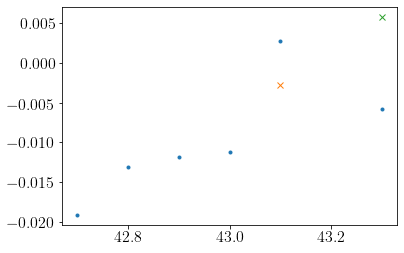

In [77]:
plt.plot( U_komp_x[indexes_line_fit],DeltaS_S_ratio[indexes_line_fit], '.')
plt.plot(U_komp_x[10], -DeltaS_S_ratio[10], 'x')
plt.plot(U_komp_x[11], -DeltaS_S_ratio[11], 'x')

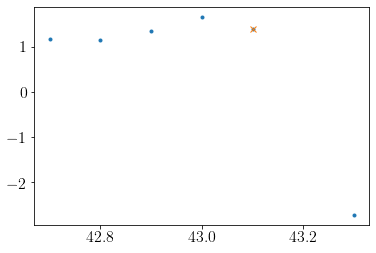

In [75]:
plt.plot( U_komp_x[indexes_line_fit],fot_phi[indexes_line_fit], '.')
plt.plot(U_komp_x[10], fot_phi[10], 'x')